In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
df=pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
# Check rows and columns
df.shape

(11251, 15)

In [4]:
# Display 5 rows and all columns
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# Display information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Drop the colunm 13 and 14 because all values are null
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
# Check sum of null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(11239, 13)

In [11]:
df['Amount']=df['Amount'].astype(int)

In [12]:
df['Amount'].dtype

dtype('int32')

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

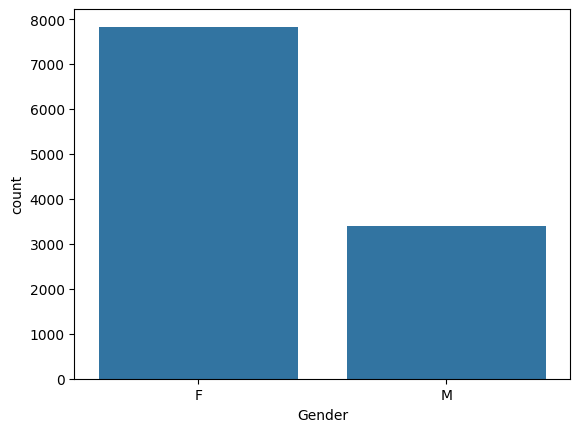

In [16]:


sns.countplot(x='Gender', data=df)

plt.show

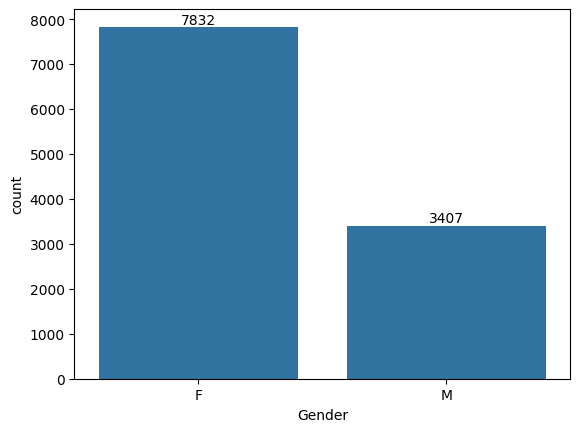

In [17]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

__Females count of purchase is more as compare to male.__

In [18]:
sales=df.groupby('Gender',as_index=False)['Amount'].sum()

In [19]:
sales

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

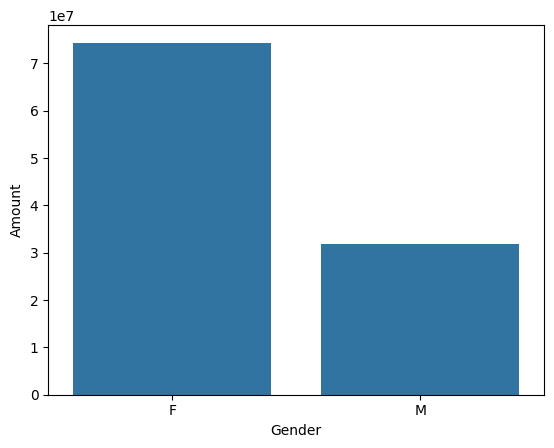

In [20]:
sns.barplot(x='Gender',y='Amount',data=sales)

__Females has spend more amount of money as compared to male__

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

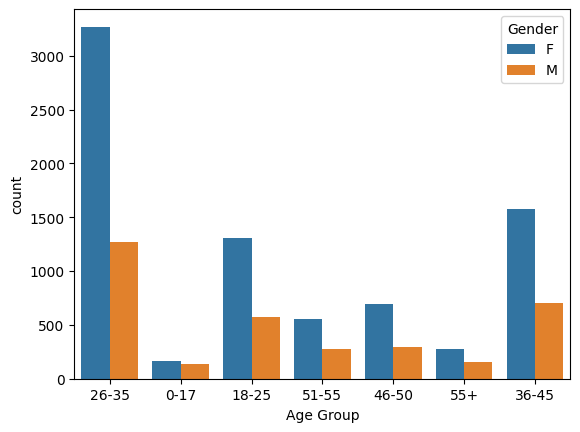

In [22]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')

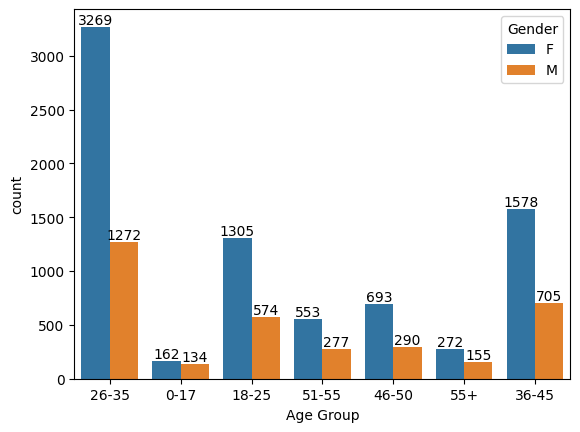

In [23]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

__Females of age group 26-35 do more shopping.__

In [24]:
sales_age=df.groupby('Age Group',as_index=False)['Amount'].sum()

In [25]:
sales_age

,Age Group,Amount
0,0-17,2699653
1,18-25,17240732
2,26-35,42613442
3,36-45,22144994
4,46-50,9207844
5,51-55,8261477
6,55+,4080987


<Axes: xlabel='Age Group', ylabel='Amount'>

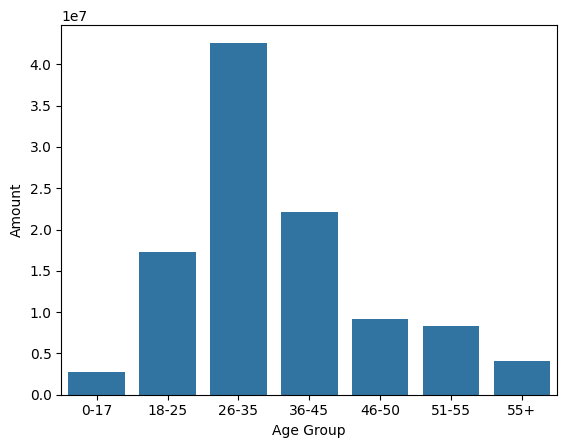

In [26]:
sns.barplot(x='Age Group',y='Amount',data=sales_age)

__Age group 26-35 spend more amount on shopping__

In [27]:
sales_state=df.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)

In [28]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

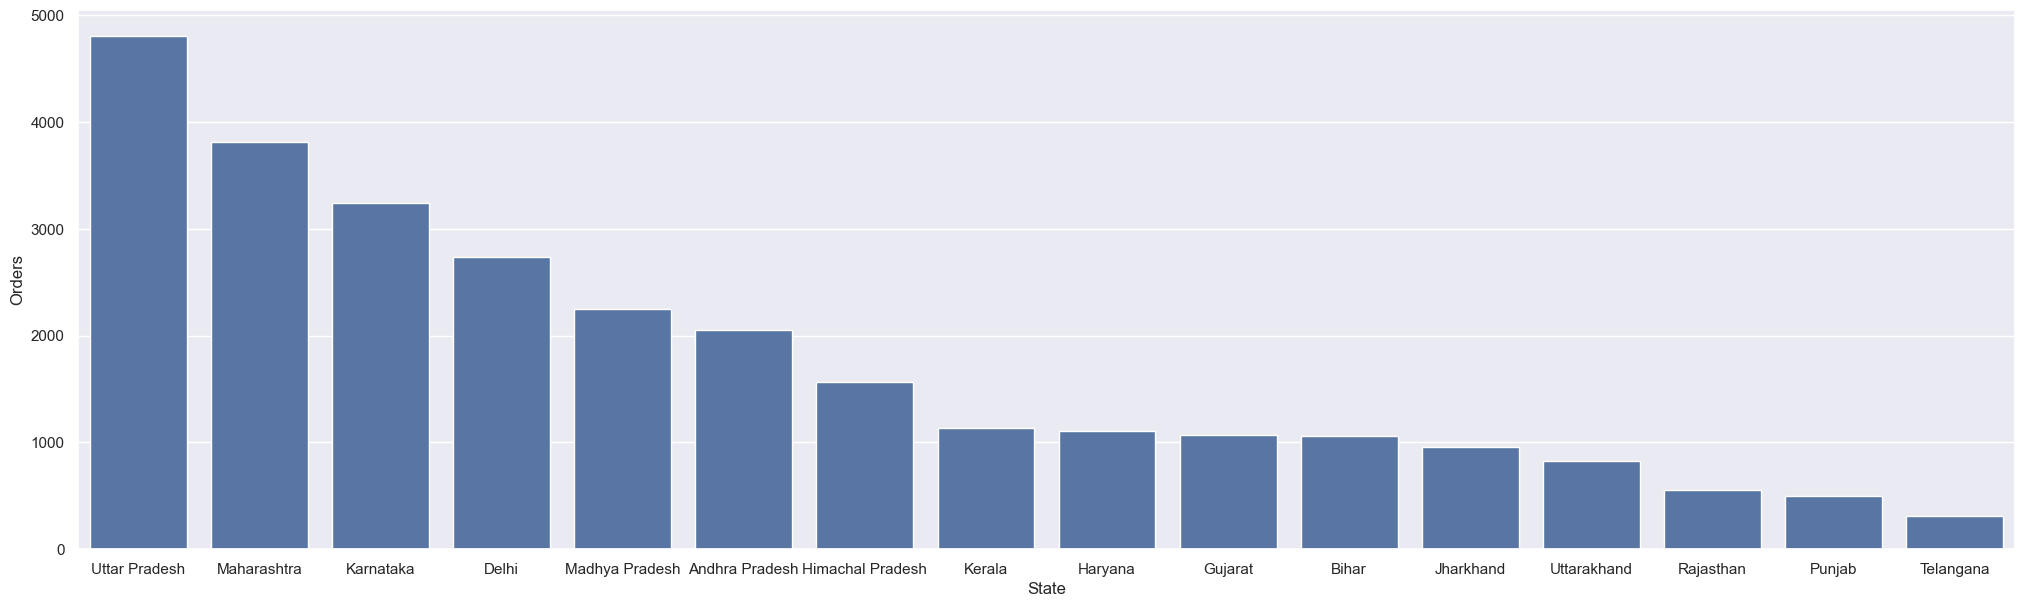

In [29]:
sns.set(rc={'figure.figsize':(25,7)})
sns.barplot(x='State',y='Orders',data=sales_state)

__Sales of Uttar Pradesh is highest in compared to another state.__

In [30]:
sales_state_amount=df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

In [31]:
sales_state_amount

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

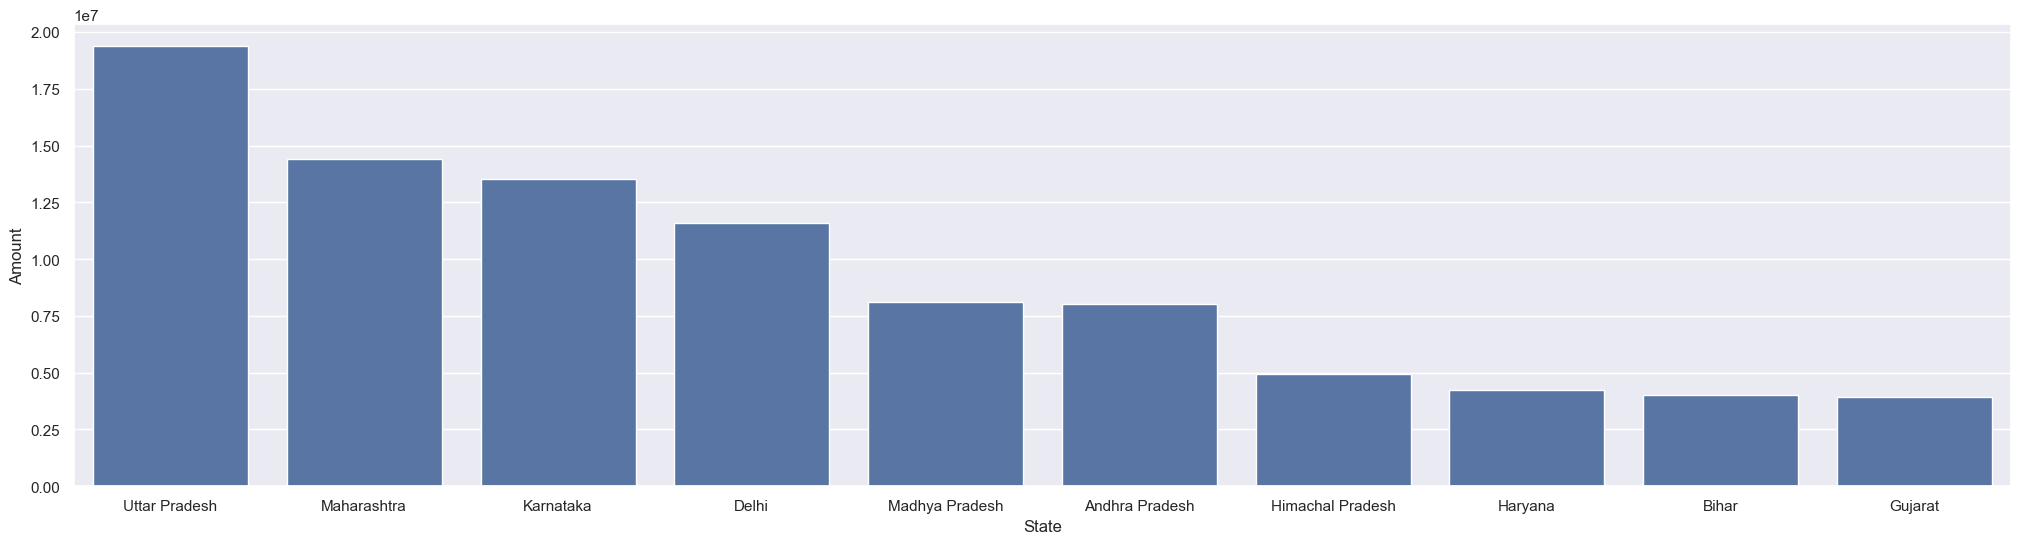

In [32]:
sns.set(rc={'figure.figsize':(25,6)})
sns.barplot(x='State',y='Amount',data=sales_state_amount)

__Uttar Pradesh,Maharashtra,Karnataka has high rate of purchase.__

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

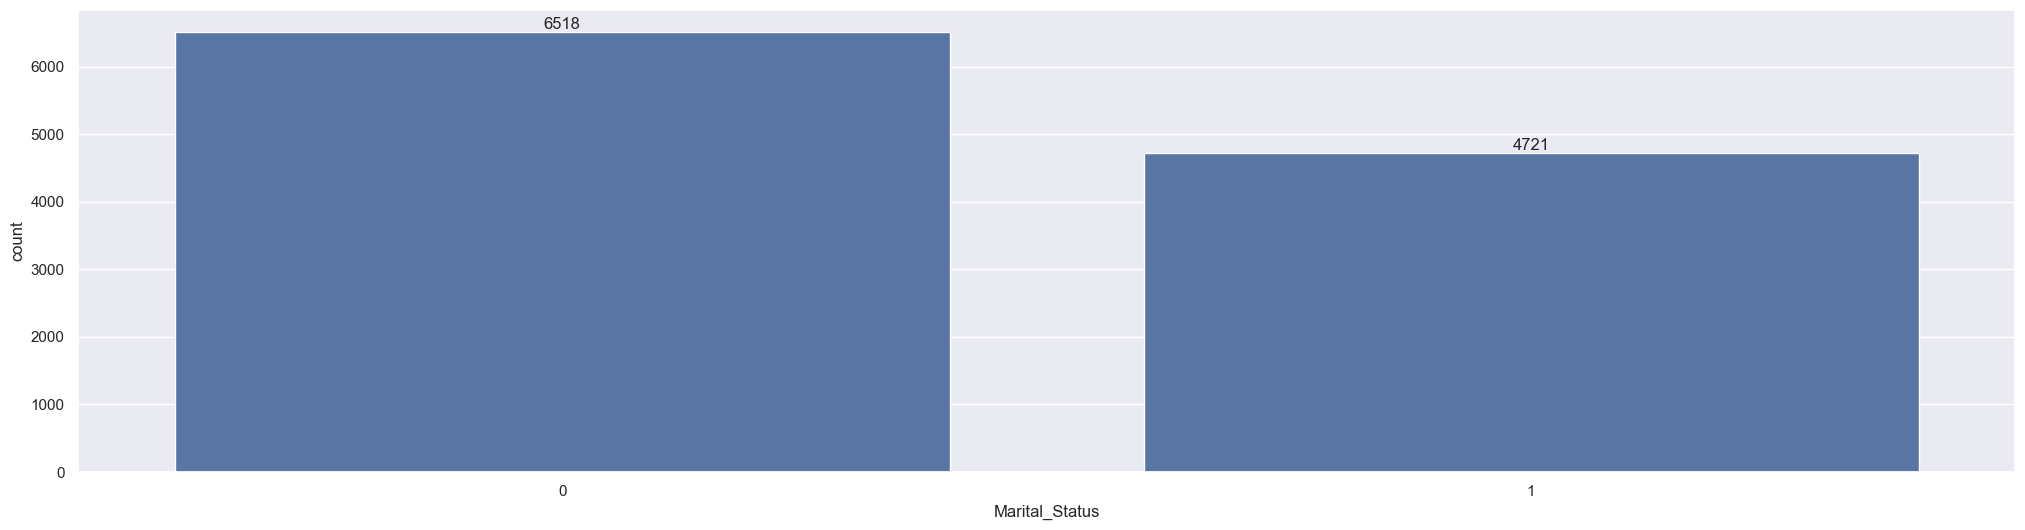

In [34]:
ax=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(2,5)})
for bars in ax.containers:
    ax.bar_label(bars)

__Married People purchase more items.__

In [35]:
sales_marital_status=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum()

In [36]:
sales_marital_status

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

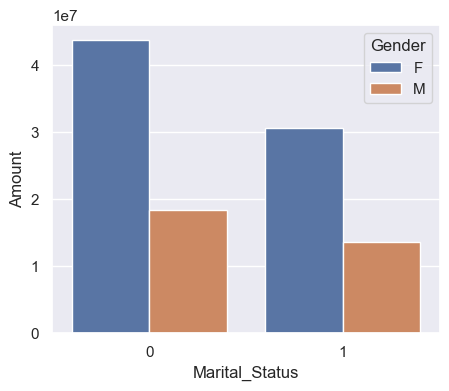

In [37]:
sns.set(rc={'figure.figsize':(5,4)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_marital_status,hue='Gender')

__Married Women has more power to buy items.__

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

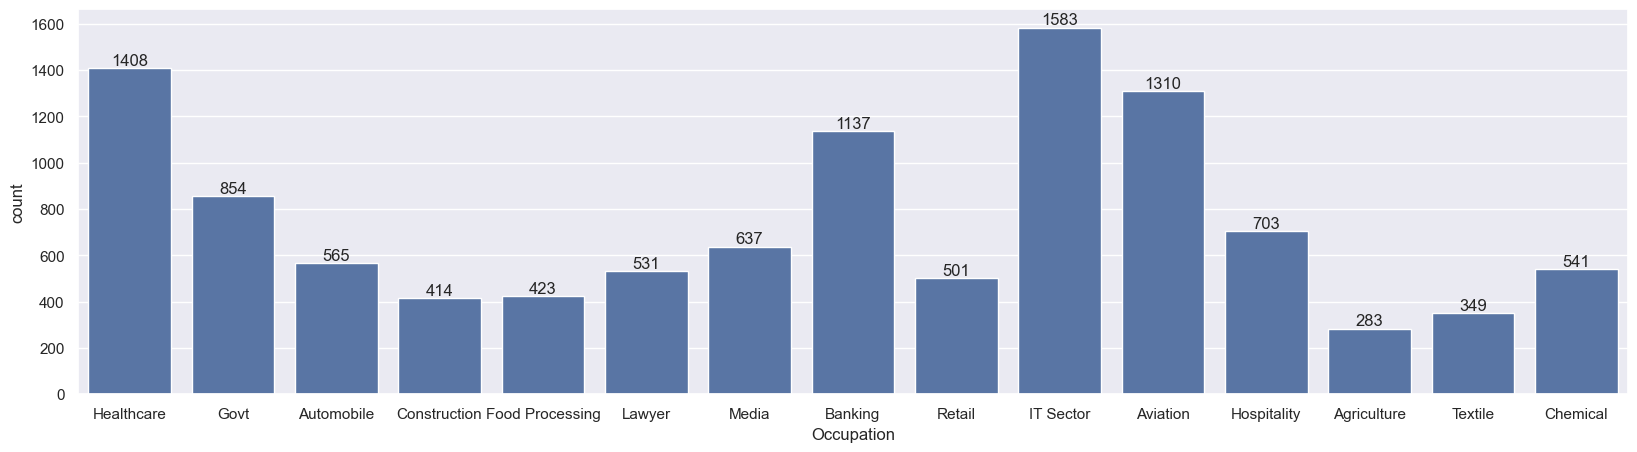

In [39]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Occupation',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

__More buyers are from IT sector.__

In [40]:
sales_occupation=df.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [41]:
sales_occupation

,Occupation,Gender,Amount
20,IT Sector,F,10184835
4,Aviation,F,9007393
16,Healthcare,F,8968231
6,Banking,F,7792295
14,Govt,F,6002907
21,IT Sector,M,4570244
24,Media,F,4375029
18,Hospitality,F,4183199
17,Healthcare,M,4066355
2,Automobile,F,3768843


<Axes: xlabel='Occupation', ylabel='Amount'>

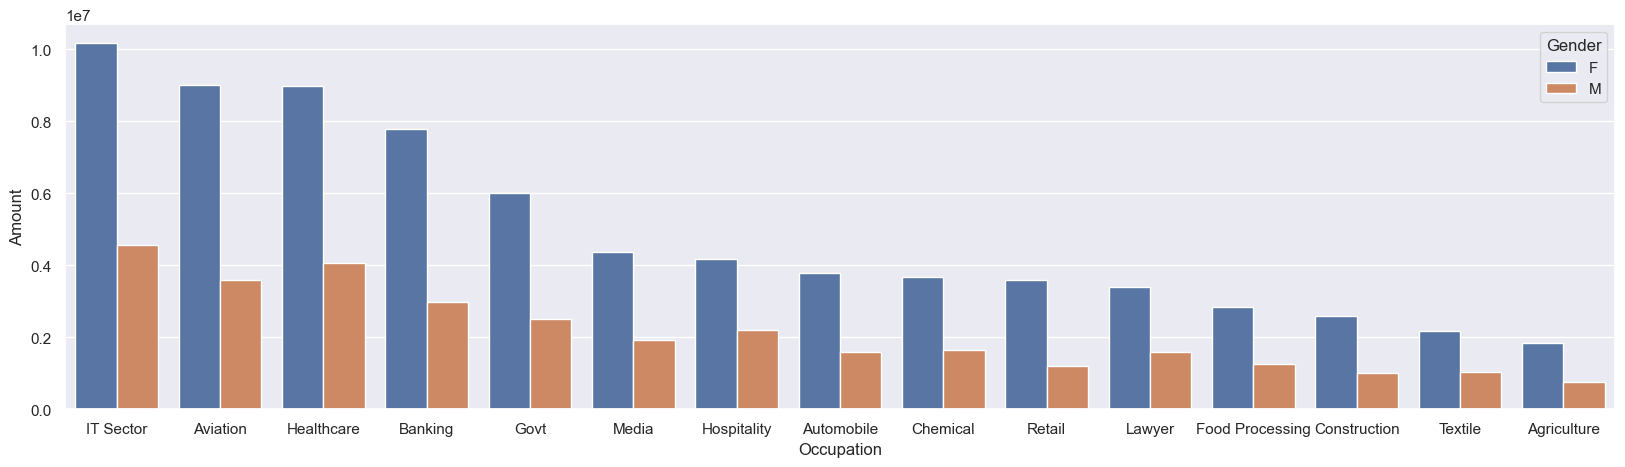

In [42]:
sns.barplot(x='Occupation',y='Amount',data=sales_occupation,hue='Gender')

__IT sector women spend more amount to purchase items.__

In [43]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

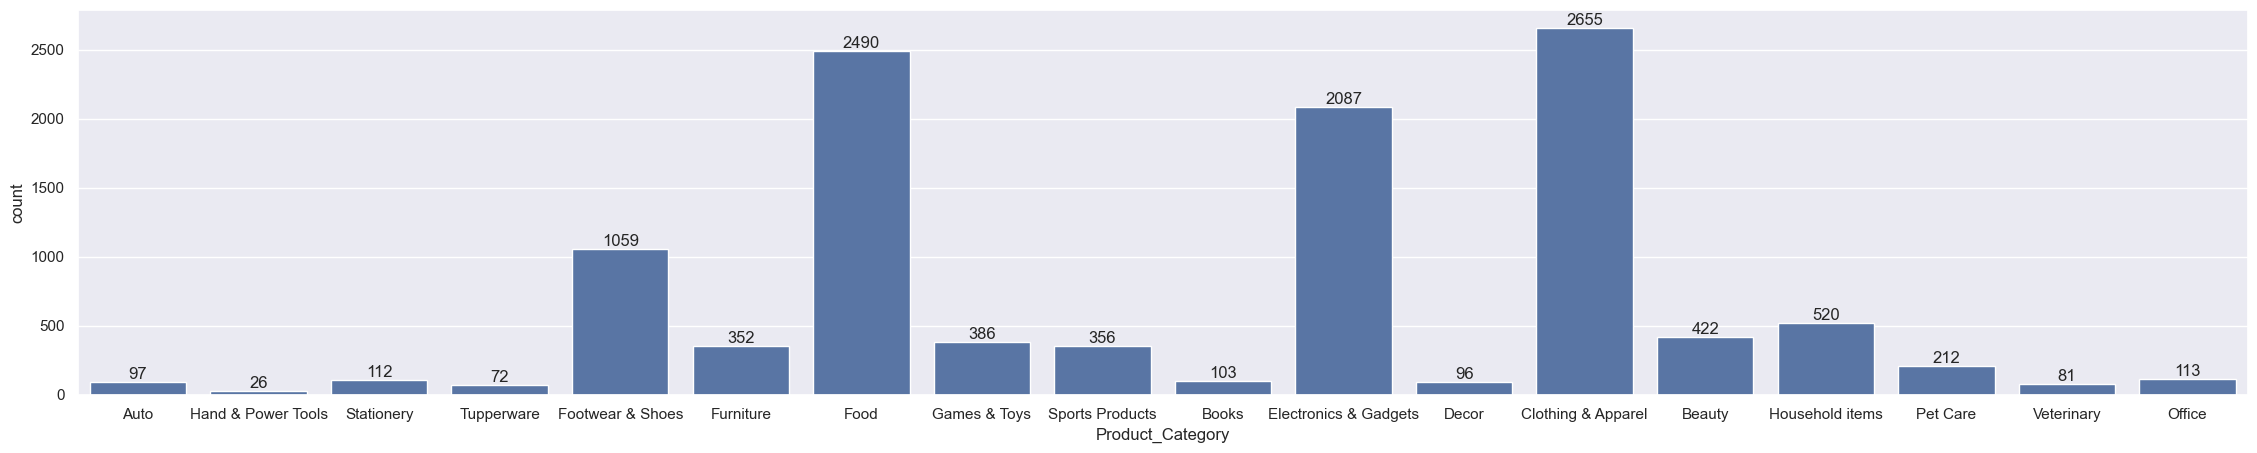

In [44]:
sns.set(rc={'figure.figsize':(28,5)})
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

__For Clothing & Apparel,food and electronics & gadgets has huge consumers.__ 

In [45]:
sales_product=df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

In [46]:
sales_product

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

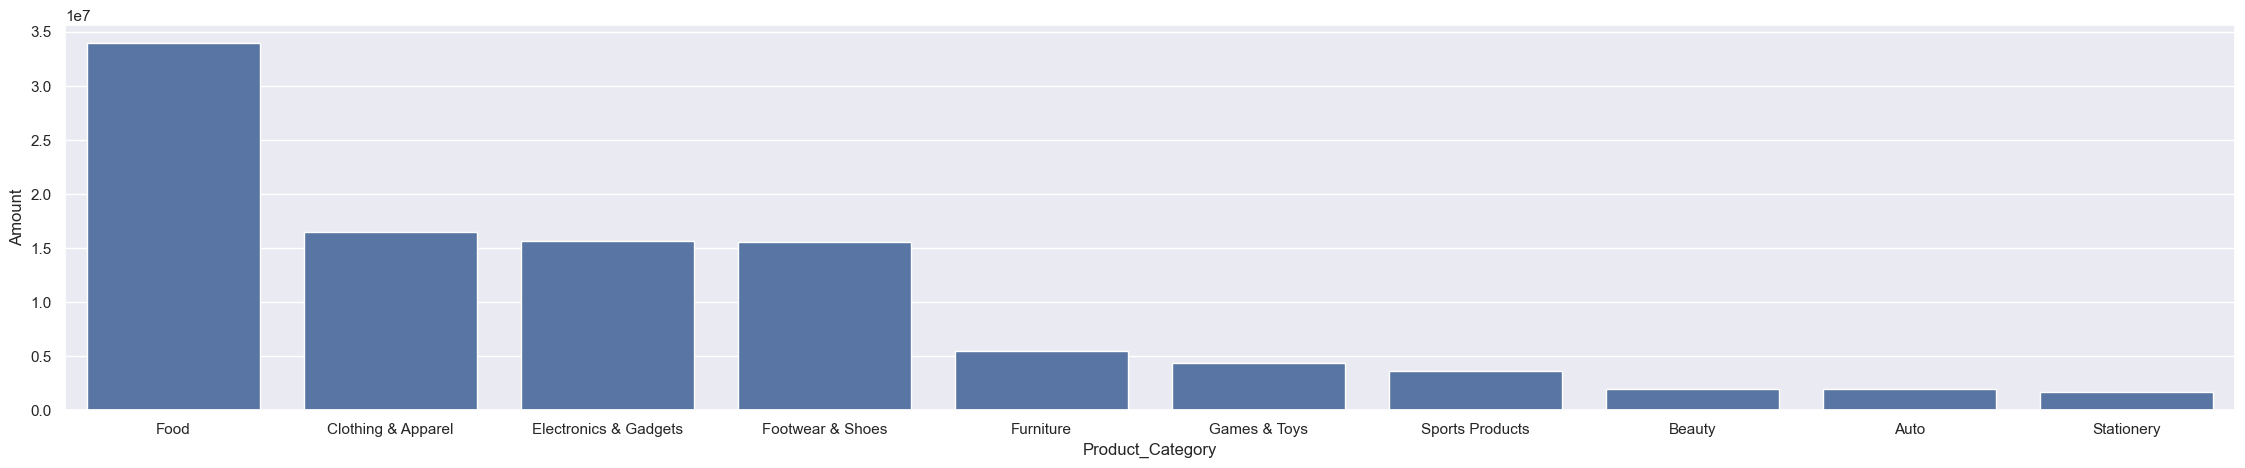

In [47]:
sns.barplot(x='Product_Category',y='Amount',data=sales_product)

__Food, Clothing & Apparel, Electronics & Gadgets generate more amount of sales.__